In [8]:
import pandas as pd # import library to read data into dataframe
pd.set_option("display.max_columns", None)
import numpy as np # import numpy library
import re # import library for regular expression
import random # library for random number generation
# import decision trees scikit-learn libraries
%matplotlib inline
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt

import graphviz

from sklearn.tree import export_graphviz

import itertools

In [4]:
recipes_df=pd.read_csv('recipes.csv')
recipes_df.head()

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,asparagus,avocado,bacon,baked_potato,balm,banana,barley,bartlett_pear,basil,bay,bean,beech,beef,beef_broth,beef_liver,beer,beet,bell_pepper,bergamot,berry,bitter_orange,black_bean,black_currant,black_mustard_seed_oil,black_pepper,black_raspberry,black_sesame_seed,black_tea,blackberry,blackberry_brandy,blue_cheese,blueberry,bone_oil,bourbon_whiskey,brandy,brassica,bread,broccoli,brown_rice,brussels_sprout,buckwheat,butter,buttermilk,cabbage,cabernet_sauvignon_wine,cacao,camembert_cheese,cane_molasses,caraway,cardamom,carnation,carob,carrot,cashew,cassava,catfish,cauliflower,caviar,cayenne,celery,celery_oil,cereal,chamomile,champagne_wine,chayote,cheddar_cheese,cheese,cherry,cherry_brandy,chervil,chicken,chicken_broth,chicken_liver,chickpea,chicory,chinese_cabbage,chive,cider,cilantro,cinnamon,citrus,citrus_peel,clam,clove,cocoa,coconut,coconut_oil,cod,coffee,cognac,concord_grape,condiment,coriander,corn,corn_flake,corn_grit,cottage_cheese,crab,cranberry,cream,cream_cheese,cucumber,cumin,cured_pork,currant,date,dill,durian,eel,egg,egg_noodle,elderberry,emmental_cheese,endive,enokidake,fennel,fenugreek,feta_cheese,fig,fish,flower,frankfurter,fruit,galanga,gardenia,garlic,gelatin,geranium,gin,ginger,goat_cheese,grape,grape_brandy,grape_juice,grapefruit,green_bell_pepper,green_tea,gruyere_cheese,guava,haddock,ham,hazelnut,herring,holy_basil,honey,hop,horseradish,huckleberry,jamaican_rum,japanese_plum,jasmine,jasmine_tea,juniper_berry,kaffir_lime,kale,katsuobushi,kelp,kidney_bean,kiwi,kohlrabi,kumquat,lamb,lard,laurel,lavender,leaf,leek,lemon,lemon_juice,lemon_peel,lemongrass,lentil,lettuce,licorice,lilac_flower_oil,lima_bean,lime,lime_juice,lime_peel_oil,lingonberry,litchi,liver,lobster,long_pepper,lovage,macadamia_nut,macaroni,mace,mackerel,malt,mandarin,mandarin_peel,mango,maple_syrup,marjoram,mate,matsutake,meat,melon,milk,milk_fat,mint,mozzarella_cheese,mung_bean,munster_cheese,muscat_grape,mushroom,mussel,mustard,mutton,nectarine,nira,nut,nutmeg,oat,oatmeal,octopus,okra,olive,olive_oil,onion,orange,orange_flower,orange_juice,orange_peel,oregano,ouzo,oyster,palm,papaya,parmesan_cheese,parsley,parsnip,passion_fruit,pea,peach,peanut,peanut_butter,peanut_oil,pear,pear_brandy,pecan,pelargonium,pepper,peppermint,peppermint_oil,pimenta,pimento,pineapple,pistachio,plum,popcorn,porcini,pork,pork_liver,pork_sausage,port_wine,potato,potato_chip,prawn,prickly_pear,provolone_cheese,pumpkin,quince,radish,raisin,rapeseed,raspberry,raw_beef,red_algae,red_bean,red_kidney_bean,red_wine,rhubarb,rice,roasted_almond,roasted_beef,roasted_hazelnut,roasted_meat,roasted_nut,roasted_peanut,roasted_pecan,roasted_pork,roasted_sesame_seed,romano_cheese,root,roquefort_cheese,rose,rosemary,rum,rutabaga,rye_bread,rye_flour,saffron,sage,sake,salmon,salmon_roe,sassafras,sauerkraut,savory,scallion,scallop,sea_algae,seaweed,seed,sesame_oil,sesame_seed,shallot,sheep_cheese,shellfish,sherry,shiitake,shrimp,smoke,smoked_fish,smoked_salmon,smoked_sausage,sour_cherry,sour_milk,soy_sauce,soybean,soybean_oil,spearmint,squash,squid,star_anise,starch,strawberry,strawberry_jam,strawberry_juice,sturgeon_caviar,sumac,sunflower_oil,sweet_potato,swiss_cheese,tabasco_pepper,tamarind,tangerine,tarragon,tea,tequila,thai_pepper,thyme,tomato,tomato_juice,truffle,tuna,turkey,turmeric,turnip,vanilla,veal,vegetable,vegetable_oil,vinegar,violet,walnut,wasabi,watercress,watermelon,wheat,wheat_bread,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,Vietnamese,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,

## Preprocessing Of Data

1. Simplify names
2. Remove unnecessary data


In [1]:
# fix name of the column displaying the cuisine
# Preprocessing of Data
column_names = recipes_df.columns.values
column_names[0] = "cuisine"
recipes_df.columns = column_names

# convert cuisine names to lower case
recipes_df["cuisine"] = recipes_df["cuisine"].str.lower()

# make the cuisine names consistent
recipes_df.loc[recipes_df["cuisine"] == "austria", "cuisine"] = "austrian"
recipes_df.loc[recipes_df["cuisine"] == "belgium", "cuisine"] = "belgian"
recipes_df.loc[recipes_df["cuisine"] == "china", "cuisine"] = "chinese"
recipes_df.loc[recipes_df["cuisine"] == "canada", "cuisine"] = "canadian"
recipes_df.loc[recipes_df["cuisine"] == "netherlands", "cuisine"] = "dutch"
recipes_df.loc[recipes_df["cuisine"] == "france", "cuisine"] = "french"
recipes_df.loc[recipes_df["cuisine"] == "germany", "cuisine"] = "german"
recipes_df.loc[recipes_df["cuisine"] == "india", "cuisine"] = "indian"
recipes_df.loc[recipes_df["cuisine"] == "indonesia", "cuisine"] = "indonesian"
recipes_df.loc[recipes_df["cuisine"] == "iran", "cuisine"] = "iranian"
recipes_df.loc[recipes_df["cuisine"] == "italy", "cuisine"] = "italian"
recipes_df.loc[recipes_df["cuisine"] == "japan", "cuisine"] = "japanese"
recipes_df.loc[recipes_df["cuisine"] == "israel", "cuisine"] = "jewish"
recipes_df.loc[recipes_df["cuisine"] == "korea", "cuisine"] = "korean"
recipes_df.loc[recipes_df["cuisine"] == "lebanon", "cuisine"] = "lebanese"
recipes_df.loc[recipes_df["cuisine"] == "malaysia", "cuisine"] = "malaysian"
recipes_df.loc[recipes_df["cuisine"] == "mexico", "cuisine"] = "mexican"
recipes_df.loc[recipes_df["cuisine"] == "pakistan", "cuisine"] = "pakistani"
recipes_df.loc[recipes_df["cuisine"] == "philippines", "cuisine"] = "philippine"
recipes_df.loc[recipes_df["cuisine"] == "scandinavia", "cuisine"] = "scandinavian"
recipes_df.loc[recipes_df["cuisine"] == "spain", "cuisine"] = "spanish_portuguese"
recipes_df.loc[recipes_df["cuisine"] == "portugal", "cuisine"] = "spanish_portuguese"
recipes_df.loc[recipes_df["cuisine"] == "switzerland", "cuisine"] = "swiss"
recipes_df.loc[recipes_df["cuisine"] == "thailand", "cuisine"] = "thai"
recipes_df.loc[recipes_df["cuisine"] == "turkey", "cuisine"] = "turkish"
recipes_df.loc[recipes_df["cuisine"] == "vietnam", "cuisine"] = "vietnamese"
recipes_df.loc[recipes_df["cuisine"] == "uk-and-ireland", "cuisine"] = "uk-and-irish"
recipes_df.loc[recipes_df["cuisine"] == "irish", "cuisine"] = "uk-and-irish"


# remove data for cuisines with < 50 recipes:
recipes_counts = recipes_df["cuisine"].value_counts()
cuisines_indices = recipes_counts > 50

cuisines_to_keep = list(np.array(recipes_counts.index.values)[np.array(cuisines_indices)])
recipes_df = recipes_df.loc[recipes_df["cuisine"].isin(cuisines_to_keep)]

# convert all Yes's to 1's and the No's to 0's
recipes_df = recipes_df.replace(to_replace="Yes", value=1)
recipes_df = recipes_df.replace(to_replace="No", value=0)

NameError: name 'recipes_df' is not defined

## Creating a D Tree only for Asian and Indian Cusines named Bamboo Tree

In [15]:
recipes_df.cuisine.value_counts()

cuisine
american                   40150
italian                     3250
mexican                     2390
french                      1264
asian                       1193
east_asian                   951
korean                       799
canadian                     774
indian                       598
western                      450
chinese                      442
spanish_portuguese           416
uk-and-irish                 368
southern_soulfood            346
jewish                       329
japanese                     320
mediterranean                289
thai                         289
german                       289
scandinavian                 250
middleeastern                248
central_southamerican        241
eastern-europe               235
greek                        225
english_scottish             204
caribbean                    183
easterneuropean_russian      146
cajun_creole                 146
moroccan                     137
african                      115
so

In [18]:
# select subset of cuisines
asian_indian_recipes = recipes_df[recipes_df.cuisine.isin([ "chinese", "indian"])]
cuisines = asian_indian_recipes["cuisine"]
ingredients = asian_indian_recipes.iloc[:,1:]

bamboo_tree = tree.DecisionTreeClassifier(max_depth=3)
bamboo_tree.fit(ingredients, cuisines)

print("Decision tree model saved to bamboo_tree!")

Decision tree model saved to bamboo_tree!


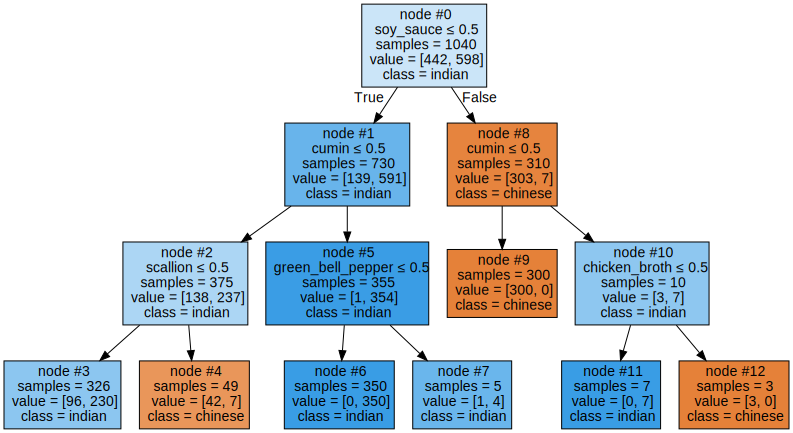

In [19]:
export_graphviz(bamboo_tree,
                feature_names=list(ingredients.columns.values),
                out_file="bamboo_tree.dot",
                class_names=np.unique(cuisines),
                filled=True,
                node_ids=True,
                special_characters=True,
                impurity=False,
                label="all",
                leaves_parallel=False)

with open("bamboo_tree.dot") as bamboo_tree_image:
    bamboo_tree_graph = bamboo_tree_image.read()
graphviz.Source(bamboo_tree_graph)

The decision tree learned:
* If a recipe contains *cumin* and *soy sauce*, then it is most likely a **Chinese** recipe.
* If a recipe contains *no cumin* but  *bell pepper* and *scallion*, then it is most likely an **Indian** recipe.


## Model Evaluation

* Convert the data to train and test to evaluate accuracy

In [20]:
bamboo = recipes_df[recipes_df.cuisine.isin([ "chinese",  "indian"])]

In [21]:
bamboo["cuisine"].value_counts()

cuisine
indian     598
chinese    442
Name: count, dtype: int64

In [22]:
# set sample size
#Let's remove 30 recipes from each cuisine to use as the test set, and let's name this test set **bamboo_test**.

sample_n = 30

In [24]:
# take 30 recipes from each cuisine
#random.seed(1234) # set random seed
bamboo_test = bamboo.groupby("cuisine", group_keys=False).apply(lambda x: x.sample(sample_n))

bamboo_test_ingredients = bamboo_test.iloc[:,1:] # ingredients
bamboo_test_cuisines = bamboo_test["cuisine"] # corresponding cuisines or labels

C:\Users\91812\AppData\Local\Temp\ipykernel_20828\225236561.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bamboo_test = bamboo.groupby("cuisine", group_keys=False).apply(lambda x: x.sample(sample_n))


In [25]:
# check that we have 30 recipes from each cuisine
bamboo_test["cuisine"].value_counts()

cuisine
chinese    30
indian     30
Name: count, dtype: int64

In [26]:
#Now create the training set by removing the test set from the **bamboo** data set, and name the training set **bamboo_train**.
bamboo_test_index = bamboo.index.isin(bamboo_test.index)
bamboo_train = bamboo[~bamboo_test_index]

bamboo_train_ingredients = bamboo_train.iloc[:,1:] # ingredients
bamboo_train_cuisines = bamboo_train["cuisine"] # corresponding cuisines or labels

In [32]:
X=bamboo_train_ingredients
y=bamboo_train_cuisines

In [27]:
bamboo_train["cuisine"].value_counts()

cuisine
indian     568
chinese    412
Name: count, dtype: int64

Let's build the decision tree using the training set, **bamboo_train**, and name the generated tree **bamboo_train_tree** for prediction.


In [29]:
bamboo_train_tree = tree.DecisionTreeClassifier(max_depth=15)
bamboo_train_tree.fit(bamboo_train_ingredients, bamboo_train_cuisines)

print("Decision tree model saved to bamboo_train_tree!")

Decision tree model saved to bamboo_train_tree!


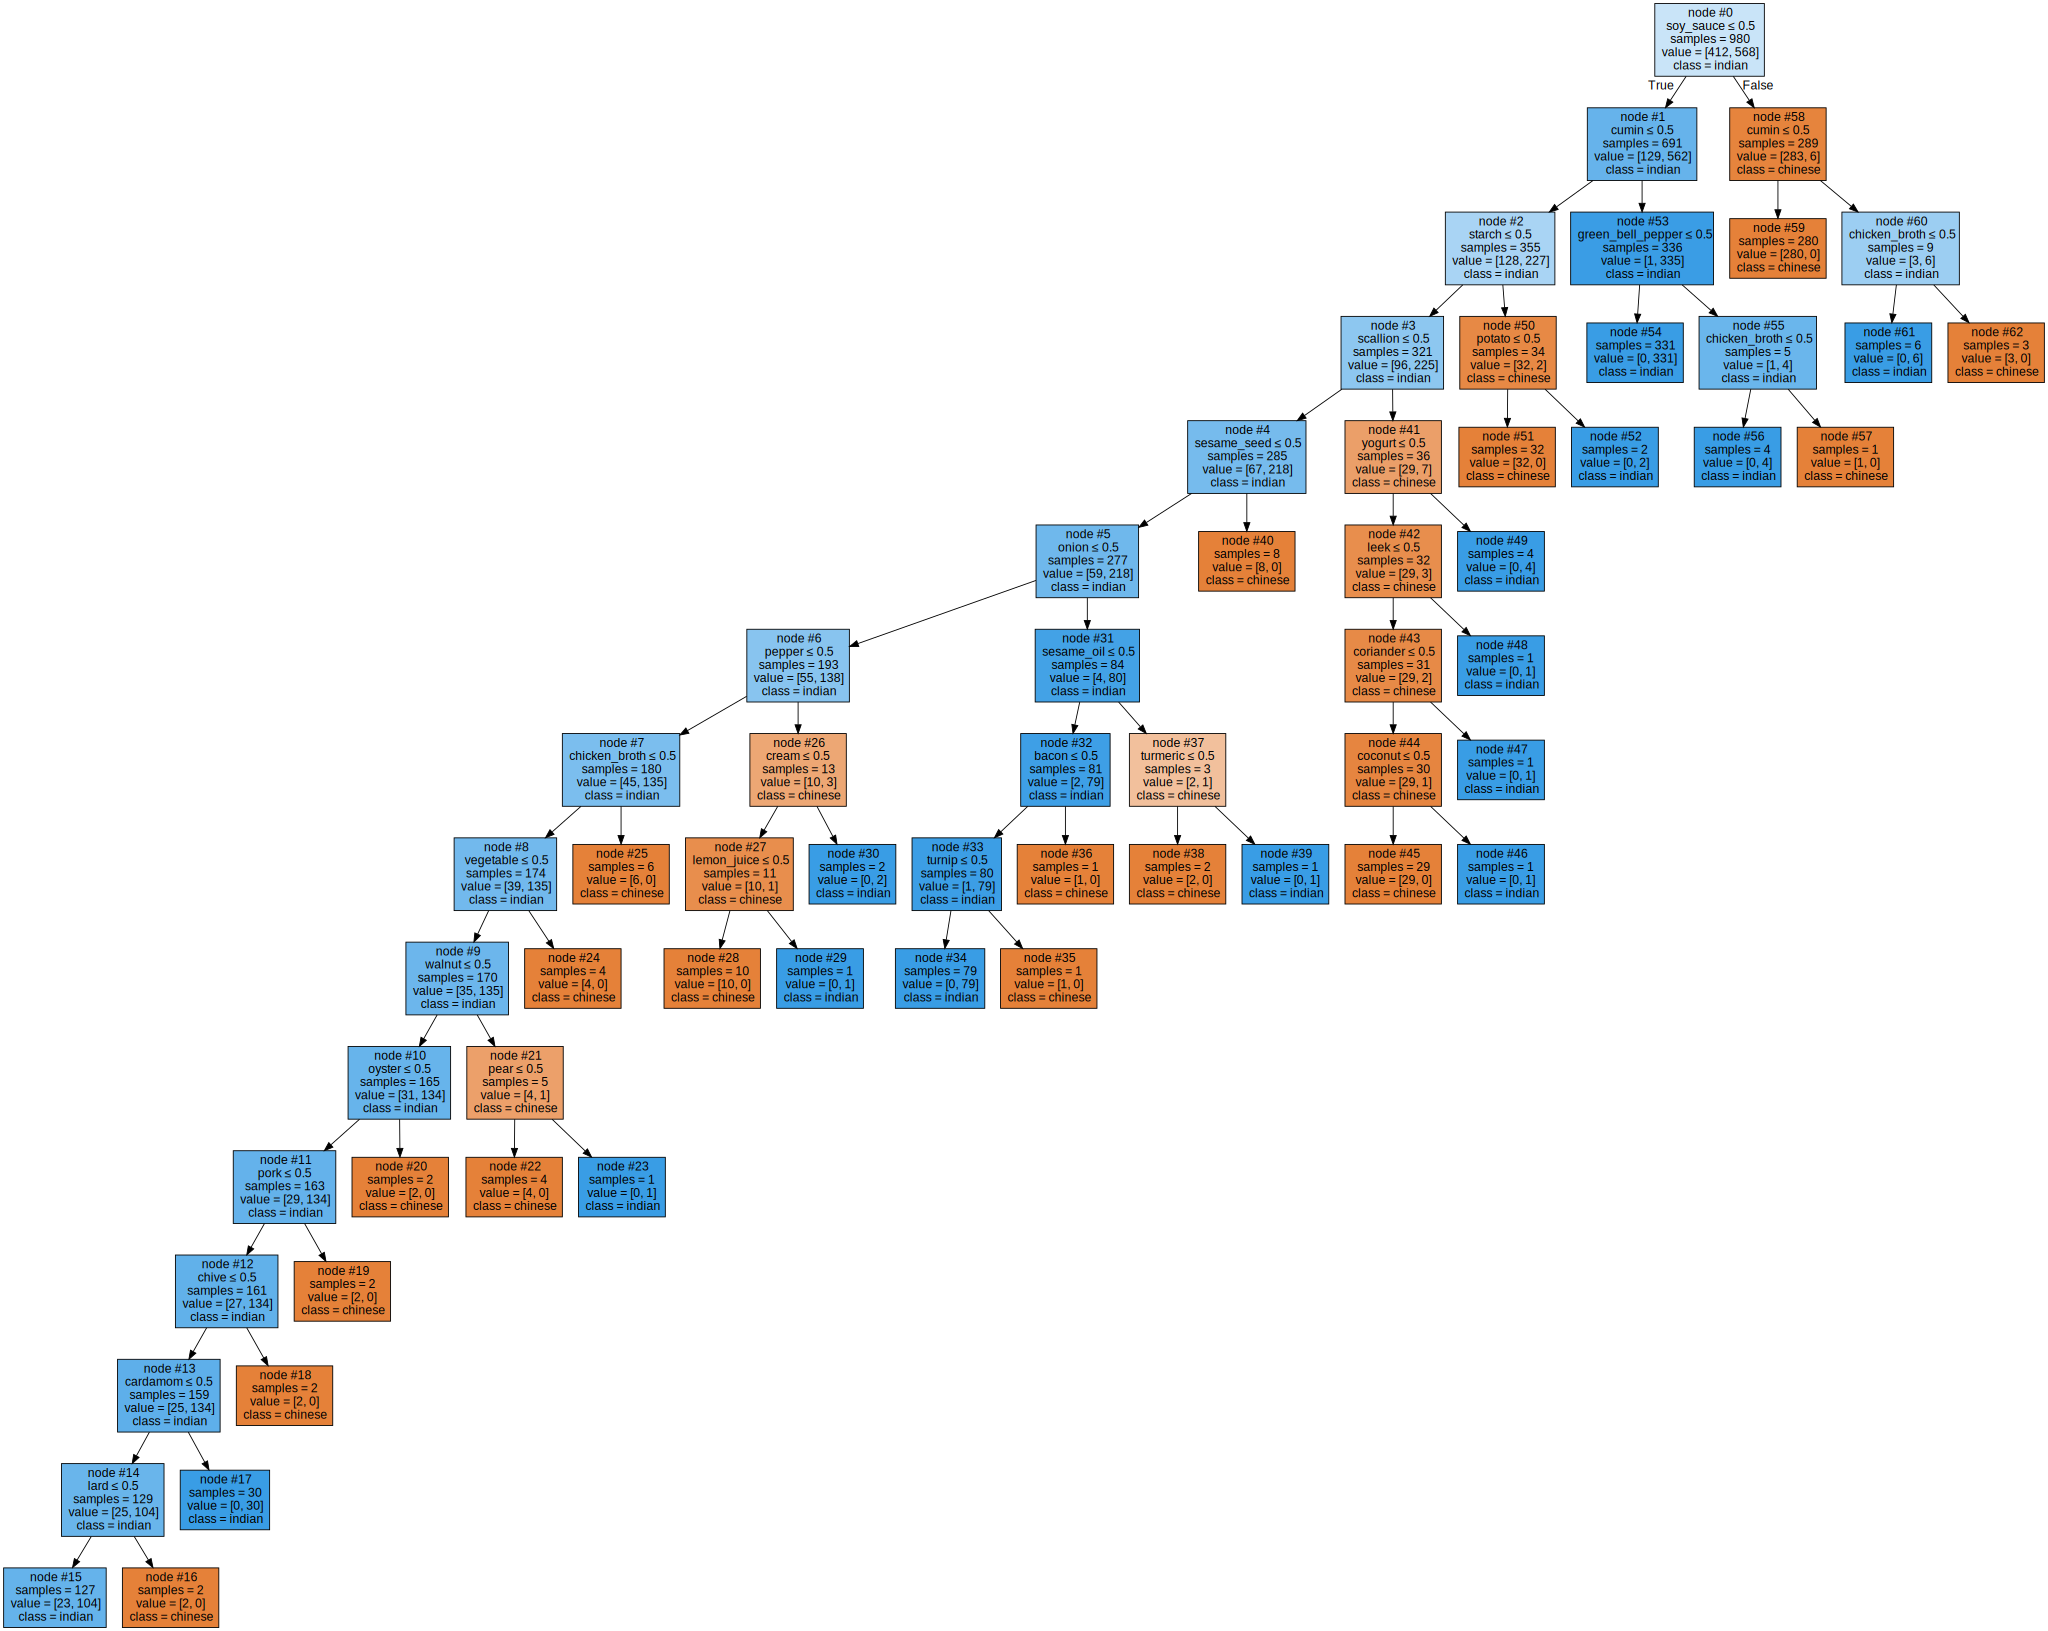

In [30]:
export_graphviz(bamboo_train_tree,
                feature_names=list(bamboo_train_ingredients.columns.values),
                out_file="bamboo_train_tree.dot",
                class_names=np.unique(bamboo_train_cuisines),
                filled=True,
                node_ids=True,
                special_characters=True,
                impurity=False,
                label="all",
                leaves_parallel=False)

with open("bamboo_train_tree.dot") as bamboo_train_tree_image:
    bamboo_train_tree_graph = bamboo_train_tree_image.read()
graphviz.Source(bamboo_train_tree_graph)

## Test

In [39]:
bamboo_pred_cuisines = bamboo_train_tree.predict(bamboo_test_ingredients)

The rows represent the actual cuisines from the dataset and the columns represent the predicted ones. Each row should sum to 100%. According to this confusion matrix, we make the following observations:

* Using the first row in the confusion matrix, 90% of the **Chinese** recipes in **bamboo_test** were correctly classified by our decision tree whereas 10% of the **Chinese** recipes were misclassified as **Korean** and 3.33% were misclassified as **Indian**.

* Using the Indian row, 96.67% of the **Indian** recipes in **bamboo_test** were correctly classified by our decision tree and 3% of the **Indian** recipes were misclassified as **Chinese**

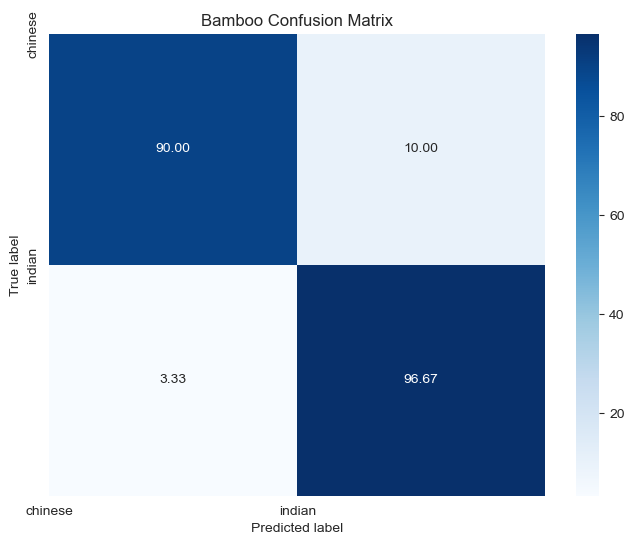

In [45]:

import seaborn as sns


# Assuming you have already defined bamboo_confusion_matrix, test_cuisines, and other necessary variables

# Normalize the confusion matrix
bamboo_confusion_matrix = (bamboo_confusion_matrix.astype('float') / bamboo_confusion_matrix.sum(axis=1)[:, np.newaxis]) * 100

# Set up the figure and axis
plt.figure(figsize=(8, 6))

# Plot the heatmap using Seaborn
sns.heatmap(bamboo_confusion_matrix, annot=True, fmt=".2f", cmap="Blues")

# Set labels and title
plt.title("Bamboo Confusion Matrix")
plt.ylabel("True label")
plt.xlabel("Predicted label")

# Set tick marks
tick_marks = np.arange(len(test_cuisines))
plt.xticks(tick_marks, test_cuisines)
plt.yticks(tick_marks, test_cuisines)

plt.show()
